<a href="https://colab.research.google.com/github/archanaqre/Concurrent_ChatGPT_execution/blob/main/weather_Location_Chittagong_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
import sys
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils as npu
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import (precision_recall_curve,PrecisionRecallDisplay)
from sklearn.metrics import precision_score


# CODE TO PREPARE PRE-PROCESSED DATA AND SPLIT IT INTO TRAINING AND TESTING SETS

def prepare_data():
  df = pd.read_csv('OutputChittagong.csv')
  X = df.drop('Rainfall',axis=1).values
  y = df['Rainfall'].values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)
  ors=RandomOverSampler(sampling_strategy=1)
  X_train_res,y_train_res=ors.fit_resample(X,y)
  scaler = MinMaxScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
  return(X_train, X_test, y_train, y_test)

# CODE TO PREPARE MODEL FOR MLP

def create_model(train_x, test_y):
  num_classes = test_y.shape[1]
  model = Sequential()
  model.add(Dense(15, input_dim=train_x.shape[1], activation='relu'))
  model.add(Dense(75, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy',
  metrics=['mse', 'accuracy'])
  return model

# CODE TO PLOT A PRECISION-RECALL CURVE

def prec_recall_comparison_curves(test_y,y_pred):
  y_test = test_y
  y_predicted = y_pred
  precision, recall, _ = precision_recall_curve(test_y, y_pred)
  disp = PrecisionRecallDisplay(precision=precision, recall=recall)
  disp.plot()
  plt.show()

# CODE TO IMPLEMENT MULTI-LAYER PERCEPTRON

def multilayer_perceptron():
  train_x, test_x, train_y, test_y = prepare_data()

  labels = test_y

  train_y = npu.to_categorical(train_y)
  test_y = npu.to_categorical(test_y)

  model = create_model(train_x, test_y)

  start = time.time()
  model.fit(train_x, train_y, epochs=50, batch_size=10, shuffle=False)
  end = time.time()

  y_pred = model.predict(test_x)
  predictions = np.argmax(y_pred, axis=1)

  correct_class = 0
  for i in range(len(labels)):
    if labels[i] == predictions[i]:
      correct_class += 1

  time_ = end - start
  accuracy = (correct_class / len(labels)) * 100

  print("\n")
  print("### MLP ###\n")
  print("Training lasted %.2f seconds" % time_)
  print("Accuracy = %.2f" % (accuracy))

  return(time_, accuracy)

# CODE TO IMPLEMENT XGBOOST

def xgboost():
  train_x, test_x, train_y, test_y = prepare_data()
  train_y = train_y.reshape((train_y.shape[0], ))

  clf = XGBClassifier(n_estimators=20)

  start = time.time()
  clf.fit(train_x, train_y)
  end = time.time()

  y_pred = clf.predict(test_x)

  prec_recall_comparison_curves(test_y,y_pred)

  time_ = end - start
  accuracy = 100 * accuracy_score(test_y, y_pred)
  precisionscore=precision_score(test_y, y_pred, average='macro')

  print("\n")
  print("### XGB ###")
  print("\nTraining lasted %.2f seconds" % time_)
  print("\nAccuracy = %.2f" % (accuracy))
  print("\nPrecision score = %.3f" %(precisionscore))

  return(time_, accuracy, precisionscore)

# CODE TO IMPLEMENT LOGISTIC REGRESSION

def logistic_regression():
  train_x, test_x, train_y, test_y = prepare_data()
  train_y = train_y.reshape((train_y.shape[0], ))

  clf = LogisticRegression(random_state=0, solver='liblinear', max_iter=300, multi_class='ovr')

  start = time.time()
  clf.fit(train_x, train_y)
  end = time.time()

  y_pred = clf.predict(test_x)
  time_ = end - start
  accuracy = 100 * accuracy_score(test_y, y_pred)

  prec_recall_comparison_curves(test_y,y_pred)

  print("\n")
  print("### LR ###\n")
  print("Training lasted %.2f seconds" % time_)
  print("Accuracy = %.2f" % (accuracy))
  precisionscore=precision_score(test_y, y_pred, average='macro')
  print("\nPrecision score = %.3f" %(precisionscore))

  return(time_, accuracy,precisionscore)

# CODE TO IMPLEMENT RANDOM FOREST

def random_forest():
  train_x, test_x, train_y, test_y = prepare_data()
  train_y = train_y.reshape((train_y.shape[0], ))

  clf = RandomForestClassifier(n_estimators=5, max_depth=5, random_state=1)

  start = time.time()
  clf.fit(train_x, train_y)
  end = time.time()

  y_pred = clf.predict(test_x)

  time_ = end - start
  accuracy = 100 * accuracy_score(test_y, y_pred)

  prec_recall_comparison_curves(test_y,y_pred)

  precisionscore=precision_score(test_y, y_pred, average='macro')

  print("\n")
  print("### RF ###\n")
  print("Training lasted %.2f seconds" % time_)
  print("Accuracy = %.2f" % (accuracy))
  print("F1-score = ",f1_score(test_y, y_pred, average='macro')*100)
  print("\nPrecision score = %.3f" %(precisionscore))

  return(time_, accuracy,precisionscore)

# CODE TO IMPLEMENT KNN

def k_neighbors():
  train_x, test_x, train_y, test_y = prepare_data()
  train_y = train_y.reshape((train_y.shape[0], ))

  clf = KNeighborsClassifier(n_neighbors=3)

  start = time.time()
  clf.fit(train_x, train_y)
  end = time.time()

  y_pred = clf.predict(test_x)

  time_ = end - start
  accuracy = 100 * accuracy_score(test_y, y_pred)

  prec_recall_comparison_curves(test_y,y_pred)

  precisionscore=precision_score(test_y, y_pred, average='macro')

  print("\n")
  print("### KNN ###")
  print("\nTraining lasted %.2f seconds" % time_)
  print("\nAccuracy = %.2f" % (accuracy))
  print("\nPrecision score = %.3f" %(precisionscore))

  return(time_, accuracy,precisionscore)

def plot_confusion_matrix(cm, target_names, title, cmap=None, normalize=False):
  if cmap is None:
    cmap = plt.get_cmap('Blues')

  plt.figure(figsize=(8, 6))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()

  if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=90)
    plt.yticks(tick_marks, target_names)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

  thresh = cm.max() / 1.5 if normalize else cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if normalize:
      plt.text(j, i, "{:0.1f}".format(cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    else:
      plt.text(j, i, "{:,}".format(cm[i, j]), horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

# CODE TO IMPLEMENT GRADIENT BOOSTING

def gradient_boosting():
  train_x, test_x, train_y, test_y = prepare_data()
  train_y = train_y.reshape((train_y.shape[0], ))

  clf = GradientBoostingClassifier(learning_rate=0.1, n_estimators=75)

  start = time.time()
  clf.fit(train_x, train_y)
  end = time.time()

  y_pred = clf.predict(test_x)

  time_ = end - start
  accuracy = 100 * accuracy_score(test_y, y_pred)

  prec_recall_comparison_curves(test_y,y_pred)

  precisionscore=precision_score(test_y, y_pred, average='macro')

  print("\n")
  print("### GB ###")
  print("\nTraining lasted %.2f seconds" % time_)
  print("\nAccuracy = %.2f" % (accuracy))
  print("\nPrecision score = %.3f" %(precisionscore))

  return(time_, accuracy, precisionscore)

# CODE TO IMPLEMENT SVM

def support_vector_machine():
  train_x, test_x, train_y, test_y = prepare_data()
  train_y = train_y.reshape((train_y.shape[0], ))

  classifier = SGDClassifier(max_iter=1000, tol=0.01, early_stopping=True)

  start = time.time()
  classifier.fit(train_x, train_y)
  end = time.time()

  y_pred = classifier.predict(test_x)

  time_ = end - start
  accuracy = 100 * accuracy_score(test_y, y_pred)

  prec_recall_comparison_curves(test_y,y_pred)

  precisionscore=precision_score(test_y, y_pred, average='macro')
  print("\n")
  print("### SVM ###")
  print("\nTraining lasted %.2f seconds" % time_)
  print("\nAccuracy = %.2f" % (accuracy))
  print("\nPrecision score = %.3f" %(precisionscore))

  return(time_, accuracy, precisionscore)

#DRIVER CODE

def comparative():
  svm_time, svm_accuracy, svm_precisionscore = support_vector_machine()
  rf_time, rf_accuracy, rf_precisionscore = random_forest()
  mlp_time, mlp_accuracy = multilayer_perceptron()
  grad_time, grad_accuracy, grad_precisionscore = gradient_boosting()
  k_time, k_accuracy, k_precisionscore = k_neighbors()
  log_time, log_accuracy, log_precisionscore = logistic_regression()
  xg_time, xg_accuracy, xg_precisionscore = xgboost()

  accuracy = [svm_accuracy, rf_accuracy, mlp_accuracy, grad_accuracy, k_accuracy, log_accuracy, xg_accuracy]

  time_ = [svm_time, rf_time, mlp_time, grad_time, k_time, log_time, xg_time]

  precisionscore= [svm_precisionscore, rf_precisionscore, grad_precisionscore, k_precisionscore, log_precisionscore, xg_precisionscore]


#------------------------------- COMPARATIVE GRAPH FOR ACCURACY ----------------------------------------------------------------------
  objects=["SVM-acc", "RF-acc", "MLP-acc","GB-acc", "K-acc", "log-acc","xg-acc"]
  y_pos = np.arange(len(objects))
  performance = [81.01, 79.18, 80.78, 81.24, 81.24, 80.78, 81.92]
  #plt.barh(y_pos, performance, align='center', alpha=0.5, color='cornflowerblue')
  fig, ax = plt.subplots(figsize=(9, 5))
  ax.barh(y_pos, performance, align='center', alpha=0.5, height=0.5, color='cornflowerblue')
  plt.yticks(y_pos, objects)
  plt.xlabel('Accuracy')
  plt.ylabel('Algorithms')
  plt.title('Comparison of all performance (ACCURACY)')
  for i, v in enumerate(performance):
    plt.text(v + 0.001, i, str(v), color='blue', ha='right', va='center')
  plt.show()


#--------------------------------- COMPARATIVE GRAPH FOR PRECISION SCORE --------------------------------------------------------------------
  objects=["SVM-precision","RF-precision","GB-precision","K-precision","log-precision","xg-precision"]
  y_pos = np.arange(len(objects))
  performance = [0.752, 0.729, 0.756, 0.756, 0.752, 0.771]
  #plt.barh(y_pos, performance, align='center', alpha=0.5, color='cornflowerblue')
  fig, ax = plt.subplots(figsize=(9, 5))
  ax.barh(y_pos, performance, align='center', alpha=0.5, height=0.5, color='cornflowerblue')
  plt.yticks(y_pos, objects)
  plt.xlabel('Precision score')
  plt.ylabel('Algorithms')
  plt.title('Comparison of all precision score')
  for i, v in enumerate(performance):
    plt.text(v + 0.001, i, str(v), color='blue', ha='right', va='center')
  plt.show()

#------------------------------------ COMPARATIVE GRAPH FOR TIME ------------------------------------------------------------------
  objects=["SVM-time", "RF-time", "MLP-time", "GB-time", "K-time", "log-time", "xg-time"]
  y_pos = np.arange(len(objects))
  performance = [0.04, 0.02, 2.346, 0.26, 0.00, 0.01, 0.06]
  #plt.barh(y_pos, performance, align='center', alpha=0.5, color='cornflowerblue')
  fig, ax = plt.subplots(figsize=(9, 5))
  ax.barh(y_pos, performance, align='center', alpha=0.5, height=0.5, color='cornflowerblue')
  plt.yticks(y_pos, objects)
  plt.xlabel('Time')
  plt.ylabel('Algorithms')
  plt.title('Comparison of all performance (TIME)')
  #for i, v in enumerate(performance):
    #plt.text(v + 0.001, i, str(v), color='blue', ha='right', va='center')
  plt.show()


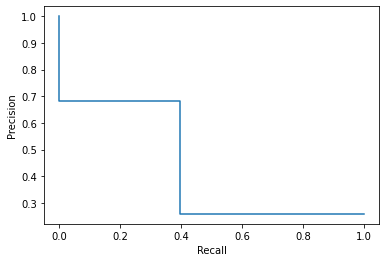



### SVM ###

Training lasted 0.01 seconds

Accuracy = 79.63

Precision score = 0.749


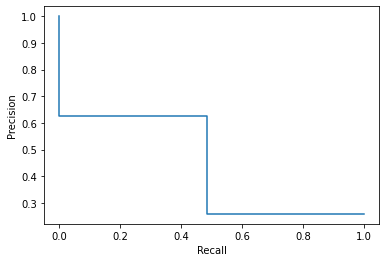



### RF ###

Training lasted 0.01 seconds
Accuracy = 79.18
F1-score =  70.60241141986945

Precision score = 0.729
Epoch 1/50
175/175 [==============================] - 1s 2ms/step - loss: 0.5338 - mse: 0.1786 - accuracy: 0.7394
Epoch 2/50
175/175 [==============================] - 0s 2ms/step - loss: 0.4234 - mse: 0.1376 - accuracy: 0.7973
Epoch 3/50
175/175 [==============================] - 0s 2ms/step - loss: 0.3967 - mse: 0.1275 - accuracy: 0.8202
Epoch 4/50
175/175 [==============================] - 0s 2ms/step - loss: 0.3877 - mse: 0.1242 - accuracy: 0.8322
Epoch 5/50
175/175 [==============================] - 0s 2ms/step - loss: 0.3829 - mse: 0.1225 - accuracy: 0.8310
Epoch 6/50
175/175 [==============================] - 0s 2ms/step - loss: 0.3796 - mse: 0.1214 - accuracy: 0.8339
Epoch 7/50
175/175 [==============================] - 0s 2ms/step - loss: 0.3770 - mse: 0.1205 - accuracy: 0.8328
Epoch 8/50
175/175 [==============================] - 0s 2ms/step - loss: 0.3742 - mse:

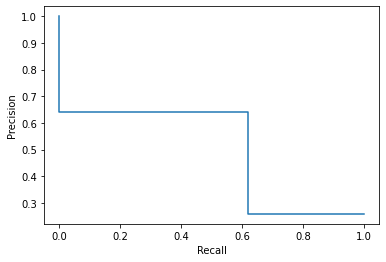



### GB ###

Training lasted 0.23 seconds

Accuracy = 81.24

Precision score = 0.756


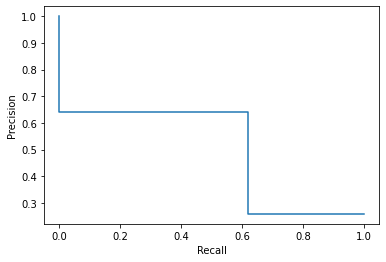



### KNN ###

Training lasted 0.00 seconds

Accuracy = 81.24

Precision score = 0.756


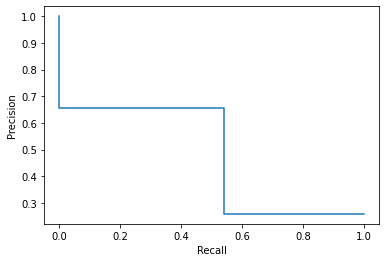



### LR ###

Training lasted 0.01 seconds
Accuracy = 80.78

Precision score = 0.752


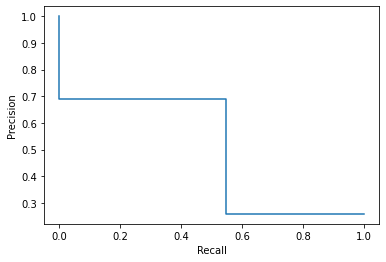



### XGB ###

Training lasted 0.03 seconds

Accuracy = 81.92

Precision score = 0.771


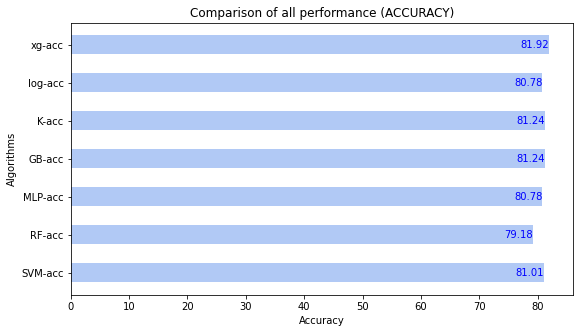

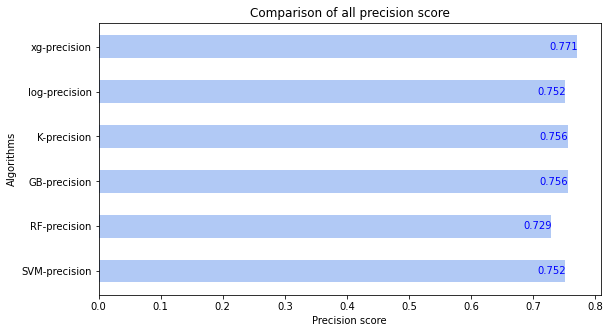

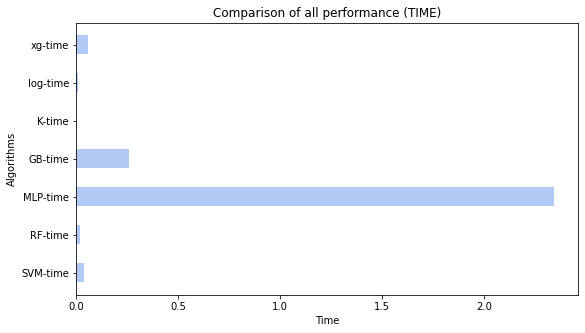

In [ ]:
comparative()